In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


batch_size = 128
num_classes = 10
epochs = 12


img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')


model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs, verbose=2)

score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


model.save('model.h5')

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/12
468/468 - 149s - loss: 1.1643 - accuracy: 0.6067 - val_loss: 0.2029 - val_accuracy: 0.9428
Epoch 2/12
468/468 - 149s - loss: 0.6285 - accuracy: 0.8000 - val_loss: 0.1155 - val_accuracy: 0.9639
Epoch 3/12
468/468 - 148s - loss: 0.4941 - accuracy: 0.8455 - val_loss: 0.1012 - val_accuracy: 0.9677
Epoch 4/12
468/468 - 148s - loss: 0.4182 - accuracy: 0.8697 - val_loss: 0.0832 - val_accuracy: 0.9734
Epoch 5/12
468/468 - 148s - loss: 0.3745 - accuracy: 0.8874 - val_loss: 0.1045 - val_accuracy: 0.9665
Epoch 6/12
468/468 - 148s - loss: 0.3397 - accuracy: 0.8967 - val_loss: 0.0781 - val_accuracy: 0.9741
Epoch 7/12
468/468 - 148s - loss: 0.3222 - accuracy: 0.9025 - val_loss: 0.0721 - val_accuracy: 0.9758
Epoch 8/12
468/468 - 148s - loss: 0.2972 - accuracy: 0.9095 - val_loss: 0.0726 - val_accuracy: 0.9769
Epoch 9/12
468/468 - 147s - loss: 0.2777 - 

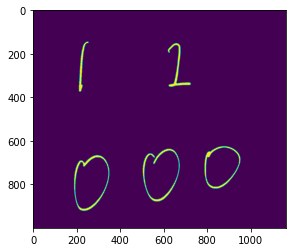

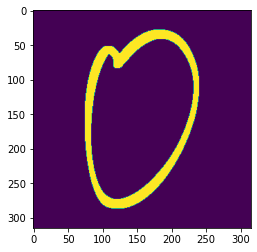

0


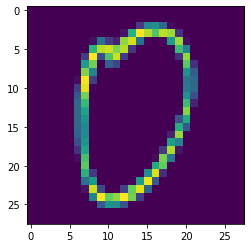

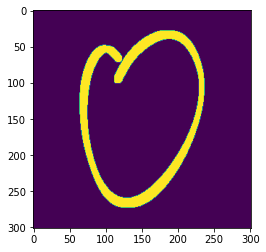

0


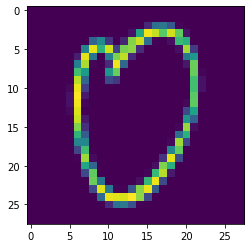

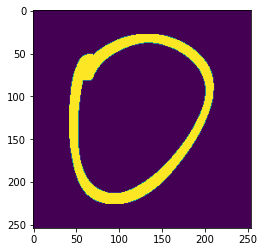

0


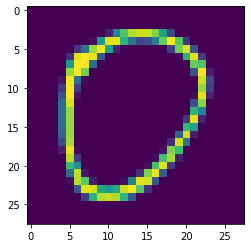

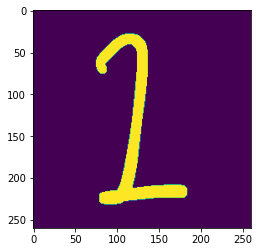

2


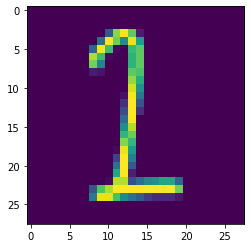

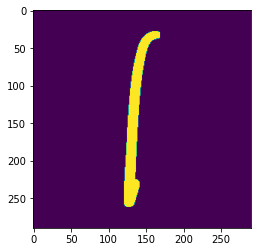

1


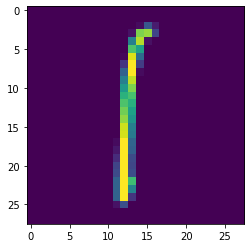

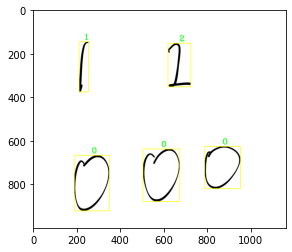

In [7]:
import cv2 as cv
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


img_color = cv.imread('test3.jpg', cv.IMREAD_COLOR)
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)


ret,img_binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

kernel = cv.getStructuringElement( cv.MORPH_RECT, ( 5, 5 ) )
img_binary = cv.morphologyEx(img_binary, cv. MORPH_CLOSE, kernel)

plt.imshow(img_binary)
plt.show()

contours, hierarchy = cv.findContours(img_binary, cv.RETR_EXTERNAL, 
                        cv.CHAIN_APPROX_SIMPLE)

for contour in contours:

    x, y, w, h = cv.boundingRect(contour)



    length = max(w, h) + 60
    img_digit = np.zeros((length, length, 1),np.uint8)

    new_x,new_y = x-(length - w)//2, y-(length - h)//2


    img_digit = img_binary[new_y:new_y+length, new_x:new_x+length]

    kernel = np.ones((5, 5), np.uint8)
    img_digit = cv.morphologyEx(img_digit, cv.MORPH_DILATE, kernel)

    plt.imshow(img_digit)
    plt.show()

    model = load_model('model.h5')

    img_digit = cv.resize(img_digit, (28, 28), interpolation=cv.INTER_AREA)

    img_digit = img_digit / 255.0

    img_input = img_digit.reshape(1, 28, 28, 1)
    predictions = model.predict(img_input)


    number = np.argmax(predictions)
    print(number)

    cv.rectangle(img_color, (x, y), (x+w, y+h), (255, 255, 0), 2)


    location = (x + int(w *0.5), y - 10)
    font = cv.FONT_HERSHEY_COMPLEX  
    fontScale = 1.2
    cv.putText(img_color, str(number), location, font, fontScale, (0,255,0), 2)
    

    plt.imshow(img_digit)
    plt.show()
    

plt.imshow(img_color)
plt.show()
